In [2]:
# trabalhando com datasets
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets # funcionalidade pronta, biblioteca que possuiu alguns datasets e coisas
                                 # uteis prontas

In [3]:
# baixa dataset mnist no diretorio passado como argumento
# pode-se pegar conjunto de treinamento ou validacao, true pega de treino 
data = datasets.MNIST('../data', train=True, download=True)
len(data)

60000

In [4]:
# dados no formato (img, target)
# img esta no formato de uma matriz enorme e ao dar print converte para formato PIL para manter padrao
img, target = data[0]
print(img) 
print(target)
img

<PIL.Image.Image image mode=L size=28x28 at 0x78A7D166EDB0>
5


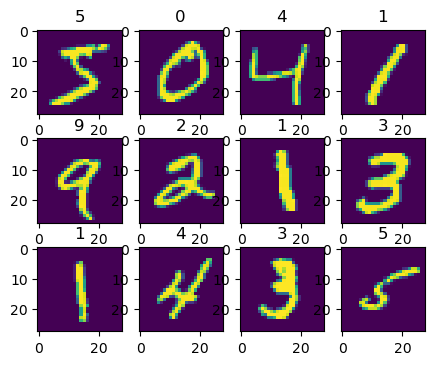

In [5]:
fig, axs = plt.subplots(3, 4, figsize=(5, 4))
axs = axs.reshape(-1) # maneira de transformar matriz 3x4 em array 1D
for i in range(len(axs)):
    img, target = data[i]
    axs[i].imshow(img)
    axs[i].set_title(target)

In [6]:
# entrada dos modelos do pytorch devem ser em tensores
def transform(img, mean=33, std=76.5):

    # conversao de PIL para torch com intermediario em numpy pois nao tem funcao de transf. direta
    img = np.array(img)
    img = torch.from_numpy(img).to(torch.float32)
    img = (img-mean)/std # normalizacao dos dados

    # adicao da dimensao do canal antes da largura e da altura
    # imagem eh 1 dado (1 imagem) de 28 linhas e 28 colunas
    img = img.reshape(1, img.shape[0], img.shape[1])

    return img


# no mnist o fundo das imagens eh preto para todos, motivo que explica todos valores iguais e negativos
img_t = transform(img)
print(img_t.mean(), img_t.std()) # media ~0 e std ~1

tensor(-0.1938) tensor(0.7687)


In [7]:
# classe abstrata que representa um dataset
# tem metodo getitem que recebe index e retorna algo; nao implementado (precisa ser implementado)
# metodo add implementado
# metodo len que precisa ser implementado

# subset recebe indices porque instancias serao de subsets dos dados, pode ter tamanho menor do que dataset
# permite criar subdataset
class Subset(Dataset):
    
    def __init__(self, data, indices, transform=None):
        self.data = data
        self.indices = indices
        self.transform = transform

    def __getitem__(self, index):
        img, target = self.data[self.indices[index]]

        if self.transform is not None:
            img = self.transform(img)
        
        return img, target
    
    def __len__(self):
        return len(self.indices)
    
random.seed(42)
# novo dataset tem itens escolhidos do dataset de forma aleatoria
indices = random.sample(range(len(data)), k=2000)
print(indices)

# para separar dados de teste e validacao
new_data_train = Subset(data, indices[:1000], transform=transform)
new_data_valid = Subset(data, indices[1000:], transform=transform)
img, target = new_data_train[0]
img

[41905, 7296, 1639, 48598, 18024, 16049, 14628, 9144, 48265, 6717, 44348, 48540, 58469, 35741, 5697, 38698, 27651, 2082, 1952, 6140, 14328, 15247, 33118, 39453, 1739, 36781, 13031, 46925, 42590, 45962, 35713, 27493, 14446, 29439, 38618, 18231, 53046, 56970, 425, 49729, 52810, 10463, 45753, 27696, 22298, 18210, 10189, 14110, 50036, 22059, 6698, 6078, 24898, 6338, 23526, 55541, 22541, 39565, 17335, 52895, 2847, 47823, 30108, 35142, 8180, 24807, 5164, 36178, 19213, 54355, 41198, 40535, 58028, 56472, 23700, 37837, 12601, 46174, 4558, 3003, 43336, 14935, 50663, 18965, 5229, 56054, 15256, 56785, 6619, 24911, 18217, 29714, 41660, 54664, 23909, 10659, 24260, 23283, 13730, 43920, 17496, 45994, 44796, 42469, 4679, 39920, 41613, 11215, 35005, 47784, 16043, 10708, 30294, 24867, 17691, 41943, 45099, 36500, 14392, 44866, 21252, 55237, 50352, 50855, 3665, 15010, 53857, 2103, 52759, 20673, 26290, 17546, 4337, 13826, 59843, 37170, 57433, 47049, 20622, 13934, 42954, 32717, 25928, 57978, 59935, 42129, 30

tensor([[[-0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314],
         [-0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314],
         [-0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314],
         [-0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0

In [8]:
np.array(img).mean()

# multiplicacoes e somas intrinsecas a redes neurais geram valores grandes
# dessa forma eh bom padronizar valores, manter eles pequenos e proximos de 0
# normalizar dados para manter media = 0; desvio = 1

0.009903947

In [9]:
def get_statistics(data):

    n = len(data)
    mean = 0.
    std = 0.

    for img, target in data:
        mean +=  np.array(img).mean()
        std  += np.array(img).std()

    mean /= n
    std  /= n

    return mean, std

# valores normalizados pois dentro de get_statitics 
# faz-se uso do __getiitem__
print(get_statistics(new_data_train))

(-0.000398681613849476, 1.0007263650894165)


In [10]:
# wraps an iterable around the Dataset to enable easy access to the samples.
# lembrar que new_data_train eh uma instancia de Subset que herda Dataset
# cada item da iteracao eh um conjunto de batch_size imagens
dl = DataLoader(new_data_train, batch_size=16, shuffle=True, num_workers=10)
dl_iter = iter(dl)
# retorna 16 imagens, aplica transform antes de retornar
# imgs eh 16x1x28x28 pois sao 16 imagens de dimensao 1x28x28
imgs, target = next(dl_iter)

print(img.shape)
print(target.shape)

img



/home/mauricio/miniconda3/envs/vc2024/lib/python3.12/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([1, 28, 28])
torch.Size([16])


tensor([[[-0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314],
         [-0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314],
         [-0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314],
         [-0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314, -0.4314,
          -0.4314, -0.4314, -0.4314, -0.4314, -0

In [11]:
# operacoes feitas aqui sao padroes de tratamento de dados e sao
# definidas na classe final definida em dataset.py

# resumo: img lida do dataset deve
# - ser convertida de PIL para tensor e ter tipo float32 pois aumenta eficiencia
# shape do tensor de cada imagem deve ser 1 x N_linhas x N_colunas
# eh boa pratica deixar imagem normalizada usando media e desvio-padrao

# utiliza-se Dataset para criar classe Subset para pegar amostras de datasets
# utiliza-se DataLoader para criar iteravel que itera sobre batchs (conjunto de imagens)